<a href="https://colab.research.google.com/github/fcignoli/Redes-Complejas-2-20222/blob/main/TPC4_Redes_Aleatorias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1)Arme  un  código  para  generar  una  red  aleatoria  tipo  Erdos  Renyi,  con *n* cantidad  de  nodos  y aproximadamente *m* cantidad de enlaces. Este tipo de red consiste en tomar *n* nodos y enlazar cada parcon una probabilidad *p*.

In [ ]:
import random as rm
import networkx as nx
import matplotlib.pylab as plt
!pip install plfit
import numpy as np
import plfit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 193 kB 8.3 MB/s 
  Created wheel for plfit: filename=plfit-1.0.3-cp37-cp37m-linux_x86_64.whl size=124666 sha256=52537f01df4423f4f12f36fe36de5361f24d77f2c14e6bca18cb80c176baa5d8
  Stored in directory: /root/.cache/pip/wheels/44/c5/30/2761386f6aea1d7ca4ffb706f90535faa81365be034b32055a
Successfully built plfit


In [ ]:
def erdos_renyi(N, p):
    e = [(i,j) for i in range(N) for j in range(i + 1, N)  if rm.random() <= p] 
    
    G = nx.empty_graph(n = N, create_using = nx.Graph) # El grafo vacío
    G.add_edges_from(e) # Agregamos los enlaces

    return G

a) Arme una red de 𝑛 = 10000 nodos y muestre que cumpla 𝑚 ≅ 𝑝𝑛(𝑛 − 1)/2.
¿Por qué vale esta relación?

In [ ]:
N = 10000
p = 10 ** (-3) #cuando mas chico sea p mas chica sera la componente gigante


G = erdos_renyi(N, p)

pos = nx.layout.fruchterman_reingold_layout(G)

#fig, ax = plt.subplots(figsize = (10, 10), )

#nx.draw_networkx_nodes(G, pos = pos, label = False, ax = ax, node_size = 10)
#nx.draw_networkx_edges(G, pos = pos, ax = ax)

#ax.axis('off')
#plt.show()

In [ ]:
m=len(G.edges.data()) #el valor de m
m_aprox=p*N*(N-1)/2

print('El m de la red es',m,', el m_aprox es',m_aprox)

El m de la red es 49787 , el m_aprox es 49995.0


b)Muestra que esta red cumple 〈𝑘𝑖 〉 = 𝑝(𝑛 − 1). ¿Por qué vale esta relación?

In [ ]:
k_aux=list(G.degree())
#veamos el grado medio
k=[]
for i in np.arange(0,len(k_aux),1):
  j = np.array([k_aux[i][1]])
  k = np.concatenate((k, j),axis=0)
k_medio=np.mean(k)
k_aprox=p*(N-1)
print('El grado medio de la red vale ',k_medio, 'si hacemos el calculo obtenemos',k_aprox)

El grado medio de la red vale  9.9574 si hacemos el calculo obtenemos 9.999


In [ ]:
#Comparemos con la red de Erdos Rengi de Networkx

F=nx.erdos_renyi_graph(N, p)
m=len(F.edges.data()) #el valor de m
m_aprox=p*N*(N-1)/2

print('El m de la red es',m,', el m_aprox es',m_aprox)
k_aux=list(F.degree())
#veamos el grado medio
k=[]
for i in np.arange(0,len(k_aux),1):
  j = np.array([k_aux[i][1]])
  k = np.concatenate((k, j),axis=0)
k_medio=np.mean(k)
k_aprox=p*(N-1)
print('El grado medio de la red vale ',k_medio, 'si hacemos el calculo obtenemos',k_aprox)

El m de la red es 49998 , el m_aprox es 49995.0
El grado medio de la red vale  9.9996 si hacemos el calculo obtenemos 9.999


Todo es consistente con lo obtenido anteriormente con nuestro algoritmo.

2)Arme un código para generar una red aleatoria, con 𝑛 cantidad de nodos y un grado inicial fijo 𝑘0
igual para cada nodo. Este tipo de red consiste en comenzar con 𝑘0 + 1 nodos de grado 𝑘0 e ir
agregando un nodo de grado 𝑘0 en cada paso. Los nodos ya agregados irán aumentando su grado
al conectarse con los nodos nuevos que se vayan agregando. La manera de conectar un nodo
nuevo a los existentes es aleatoria, donde el enlace entre el nuevo nodo y uno existente ocurre
con igual probabilidad para todos los nodos existentes. Es decir, la probabilidad de que el nodo
nuevo se enlace a uno existente (𝑖) es: 𝑃𝑖 = 1/𝑛𝑖 . Donde 𝑛𝑖 son todos los nodos existentes en ese
paso

In [ ]:
#lo que nos piden es similar a Barabasi pero con con el weights muteado
def red_nueva(m0, m, N, id_followed_nodes = []):
    """
    m0 : número inicial de nodos
    m : número de links con el que se incorpora un nuevo nodo
    N : número de nodos final
    """

    G = nx.complete_graph(m0, create_using = nx.Graph)
    Nt = G.number_of_nodes()

    while Nt <= N:
        Nodes_t = list(G.nodes())
        edges_t = G.number_of_edges()
        degrees_t = np.array(list(dict(G.degree()).values()))
        

        new_edges = [(Nt, i) for i in rm.choices(Nodes_t, # La población de la cual tomaremos una muestra
                                                 #weights = degrees_t / (2 * edges_t), # Los pesos con los que muestrearemos
                                                 k = m # El tamaño de la muestra                                                      
                                                 )
                                                 ]

#        new_edges = [(Nt, i) for i in rm.sample([i for i, k in enumerate(degrees_t) for j in range(k)]
#                                               ,k = m)]                                               
        G.add_node(Nt)
        G.add_edges_from(new_edges)
        Nt = G.number_of_nodes()
        if len(id_followed_nodes) != 0:
            for id in id_followed_nodes:
                if id in G.nodes():
                    G.nodes[id][Nt - m0] = G.degree(id)
    return G

3)Arme un código para generar una red aleatoria tipo Barabasi, con 𝑛 cantidad de nodos y un grado
inicial fijo 𝑘0 igual para cada nodo. Este tipo de red consiste en comenzar con pocos nodos de
grado 𝑘0 e ir agregando un nodo de grado 𝑘 en cada paso. Los nodos ya agregados irán
aumentando su grado al conectarse con los nodos nuevos que se vayan agregando. La manera de
conectar un nodo nuevo a los existentes es aleatoria, determinada por una probabilidad
proporcional al grado de cada nodo existente. Es decir, la probabilidad de que el nodo nuevo se
enlace a uno existente (𝑖) es: 𝑃𝑖 = 𝑘𝑖 / ∑𝑛𝑗=1 𝑘𝑗 . Donde la sumatoria es sobre todos los nodos
existentes 𝑛.

In [ ]:
#Usamos la propuesta de clase
def barabasi_albert(m0, m, N, id_followed_nodes = []):
    """
    m0 : número inicial de nodos
    m : número de links con el que se incorpora un nuevo nodo
    N : número de nodos final
    """

    G = nx.complete_graph(m0, create_using = nx.Graph)
    Nt = G.number_of_nodes()

    while Nt <= N:
        Nodes_t = list(G.nodes())
        edges_t = G.number_of_edges()
        degrees_t = np.array(list(dict(G.degree()).values()))
        

        new_edges = [(Nt, i) for i in rm.choices(Nodes_t, # La población de la cual tomaremos una muestra
                                                 weights = degrees_t / (2 * edges_t), # Los pesos con los que muestrearemos
                                                 k = m # El tamaño de la muestra                                                      
                                                 )
                                                 ]

#        new_edges = [(Nt, i) for i in rm.sample([i for i, k in enumerate(degrees_t) for j in range(k)]
#                                               ,k = m)]                                               
        G.add_node(Nt)
        G.add_edges_from(new_edges)
        Nt = G.number_of_nodes()
        if len(id_followed_nodes) != 0:
            for id in id_followed_nodes:
                if id in G.nodes():
                    G.nodes[id][Nt - m0] = G.degree(id)
    return G

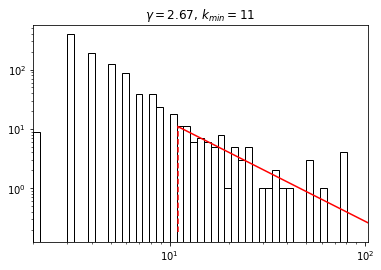

In [ ]:
#Ejemplo de clase
G = barabasi_albert(10, 3, 10 ** 3)
grado = list(dict(G.degree()).values())
fiteo = plfit.plfit(grado)
gamma = fiteo._alpha
kmin = fiteo._xmin

fig, ax = plt.subplots()
fiteo.plotpdf()
ax.set_title(f'$\gamma = {round(gamma,2)}$, '+ '$k_{min}$' + f'$={kmin}$')
plt.show()

a) Arme una red de 𝑛 = 10000 nodos y muestre que cumpla 𝑚 ≅ 𝑘0 𝑛.
¿Por qué vale esta relación?

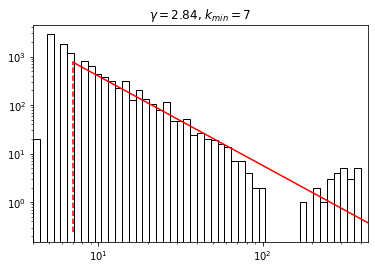

Veamos que m= 50018 lo que es aproximadamente igual a k_0 N= 50000


In [ ]:
G = barabasi_albert(25, 5, 10000) #decido poner estos parametros fuera de la n fija
grado = list(dict(G.degree()).values())
fiteo = plfit.plfit(grado)
gamma = fiteo._alpha
kmin = fiteo._xmin

fig, ax = plt.subplots()
fiteo.plotpdf()
ax.set_title(f'$\gamma = {round(gamma,2)}$, '+ '$k_{min}$' + f'$={kmin}$')
plt.show()

print('Veamos que m=',len(G.edges.data()), 'lo que es aproximadamente igual a k_0 N=',5*10000)

4)Usando los 3 generadores  de  redes  de  los  ejercicios  1),  2)  y  3), genere 4redes  para  cada  uno donde 𝑚 y 𝑛 sean similares a aquellos delas redes de datos numeradas al comienzo.

In [ ]:
from urllib.request import urlopen
from io import BytesIO
from zipfile import ZipFile
from tqdm import tqdm


url = "http://materias.df.uba.ar/rca2022c2/files/2022/10/netscience.zip"
with urlopen(url) as zipresp:
    with ZipFile(BytesIO(zipresp.read())) as zfile:
       archivos = zfile.namelist()
       for archivo in tqdm(archivos):
           if archivo.endswith('.txt'):
               zfile.extract(archivo, '/content')
           if archivo.endswith('.gml'):
               zfile.extract(archivo, '/content')
print('archivos cargados')



def abrir_txt(nombre_archivo):
    archivo=open(nombre_archivo)
    data=[]
    for linea in archivo:
        linea=linea.strip()
        columna=linea.split()
        data.append(columna)    
    return data

def abrir_reguly(nombre_archivo):
    archivo = open(nombre_archivo)
    data = []
    for linea in archivo:
        linea=linea.strip()
        columna=linea.split()
        data.append(columna)  
    data = data[1:]
    enlaces = []
    for linea in data:
      enlaces.append(linea[:2])
    return(enlaces)
def hacer_lista_grados(Red):
  lista_grados=[grado for (nodo,grado) in Red.degree()]
  return lista_grados

Data_Y2H = abrir_txt('/content/yeast_Y2H.txt')
Data_APMS = abrir_txt('/content/yeast_AP-MS.txt')
Red_netscience=nx.read_gml('/content/netscience.gml')
#Data_electrica = abrir_txt('/content/power_enlaces.txt')

Red_netscience=nx.read_gml('/content/netscience.gml')
Red_Y2H=nx.Graph()
Red_Y2H.add_edges_from(Data_Y2H)
Red_APMS=nx.Graph()
Red_APMS.add_edges_from(Data_APMS)
#Red_electrica=nx.Graph()
#Red_electrica.add_edges_from(Data_electrica)
#Red_netscience=nx.Graph()
#Red_netscience.add_edges_from(Data_netscience)


#Armamos una lista que contenga todos los grados de los nodos
lista_grados_Y2H = hacer_lista_grados(Red_Y2H)
lista_grados_APMS = hacer_lista_grados(Red_APMS)
lista_grados_netscience= hacer_lista_grados(Red_netscience)


100%|██████████| 9/9 [00:00<00:00, 655.10it/s]


archivos cargados


In [ ]:
#como el de data electrica estaba en un rar y no sabia abrirlo directo lo baje a mi drive y lo abro desde ahi
from google.colab import drive
drive.mount('/content/drive')
Data_electrica = abrir_txt('/content/drive/MyDrive//Redes/power_enlaces.txt')

Red_electrica=nx.Graph()
Red_electrica.add_edges_from(Data_electrica)
lista_grados_electrica = hacer_lista_grados(Red_electrica)

Mounted at /content/drive


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


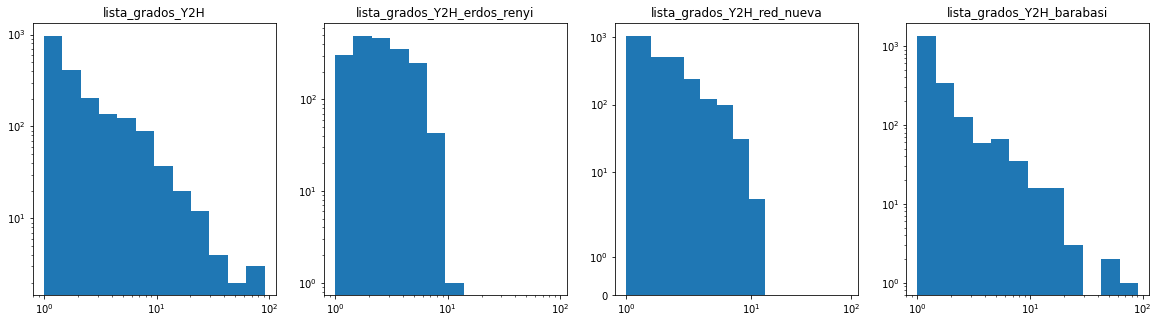

In [ ]:
#calcumemos m y n para cada red dato y generemos las redes pedidas

#empecemos con Y2H
# yo necesito saber p, pero voy a usar las aproximaciones que utilizamos antes
m=len(Red_Y2H.edges.data())
n=len(Red_Y2H.nodes)
p=(2*m)/(n*(n-1)) #despejo p de la relacion que comprobe antes
Y2H_erdos_renyi = erdos_renyi(n, p)
Y2H_red_nueva = red_nueva(1, 1, n) # n conocido m_0 y m juego un poco
Y2H_barabasi =  barabasi_albert(1, 1, n) # n conocido m_0 y m juego un poco

lista_grados_Y2H = hacer_lista_grados(Red_Y2H)
lista_grados_Y2H_erdos_renyi = hacer_lista_grados(Y2H_erdos_renyi)
lista_grados_Y2H_red_nueva = hacer_lista_grados(Y2H_red_nueva)
lista_grados_Y2H_barabasi = hacer_lista_grados(Y2H_barabasi)


lista = [lista_grados_Y2H,lista_grados_Y2H_erdos_renyi, lista_grados_Y2H_red_nueva,lista_grados_Y2H_barabasi ]
nombres = ['lista_grados_Y2H','lista_grados_Y2H_erdos_renyi', 'lista_grados_Y2H_red_nueva','lista_grados_Y2H_barabasi']
#escala logaritmica
plt.figure(figsize=(20,5))
bines=np.logspace(0,np.log10(np.max(lista[0])),13)
ax1=plt.subplot(1,4,1)
ax1.set_title(nombres[0])
ax1.hist(lista[0],bines)
ax1.set_xscale('log');plt.yscale('log')
ax2=plt.subplot(1,4,2)
ax2.hist(lista[1],bines)
ax2.set_xscale('log');plt.yscale('log')
ax2.set_title(nombres[1])
ax3=plt.subplot(1,4,3)
ax3.hist(lista[2],bines)
ax3.set_xscale('symlog');plt.yscale('symlog')
ax3.set_title(nombres[2])
ax4=plt.subplot(1,4,4)
ax4.hist(lista[3],bines)
ax4.set_xscale('log');plt.yscale('log')
ax4.set_title(nombres[3])
plt.show()


Podemos ver que Barabasi es el modelo con el que mejor simulamos una red aleatoria similar a la de nuestro dataset. Es llamativo que en Erdos-Renyi, ni siquiera es correcto el orden de magnitud de la distribución de grado.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


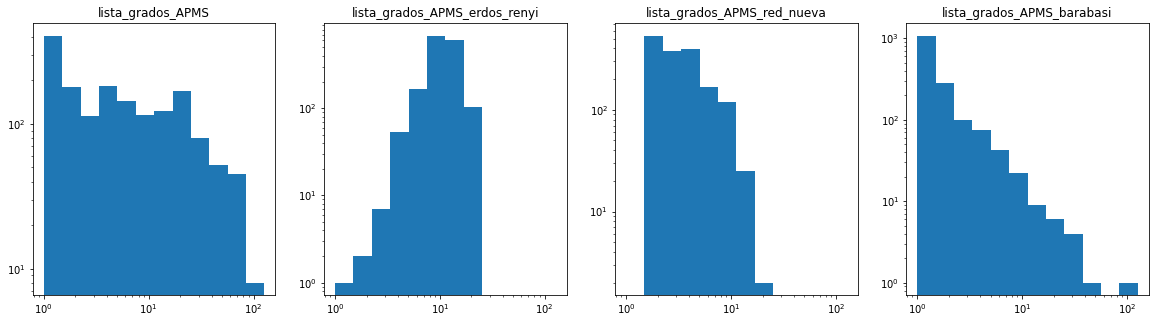

In [ ]:
#APMS
# yo necesito saber p, pero voy a usar las aproximaciones que utilizamos antes
m=len(Red_APMS.edges.data())
n=len(Red_APMS.nodes)
p=(2*m)/(n*(n-1)) #despejo p de la relacion que comprobe antes
APMS_erdos_renyi = erdos_renyi(n, p)
APMS_red_nueva = red_nueva(1,2,n)
APMS_barabasi = barabasi_albert(1, 1, n) #esto hay que ver por lo que unico que puedo fijar conocido es n

lista_grados_APMS = hacer_lista_grados(Red_APMS)
lista_grados_APMS_erdos_renyi = hacer_lista_grados(APMS_erdos_renyi)
lista_grados_APMS_red_nueva = hacer_lista_grados(APMS_red_nueva)
lista_grados_APMS_barabasi = hacer_lista_grados(APMS_barabasi)


lista = [lista_grados_APMS,lista_grados_APMS_erdos_renyi, lista_grados_APMS_red_nueva,lista_grados_APMS_barabasi ]
nombres = ['lista_grados_APMS','lista_grados_APMS_erdos_renyi', 'lista_grados_APMS_red_nueva','lista_grados_APMS_barabasi']
#escala logaritmica
plt.figure(figsize=(20,5))
bines=np.logspace(0,np.log10(np.max(lista[0])),13)
ax1=plt.subplot(1,4,1)
ax1.set_title(nombres[0])
ax1.hist(lista[0],bines)
ax1.set_xscale('log');plt.yscale('log')
ax2=plt.subplot(1,4,2)
ax2.hist(lista[1],bines)
ax2.set_xscale('log');plt.yscale('log')
ax2.set_title(nombres[1])
ax3=plt.subplot(1,4,3)
ax3.hist(lista[2],bines)
ax3.set_xscale('log');plt.yscale('log')
ax3.set_title(nombres[2])
ax4=plt.subplot(1,4,4)
ax4.hist(lista[3],bines)
ax4.set_xscale('log');plt.yscale('log')
ax4.set_title(nombres[3])
plt.show()


En este caso ningun modelo nos devuelve algo similar a lo esperado.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


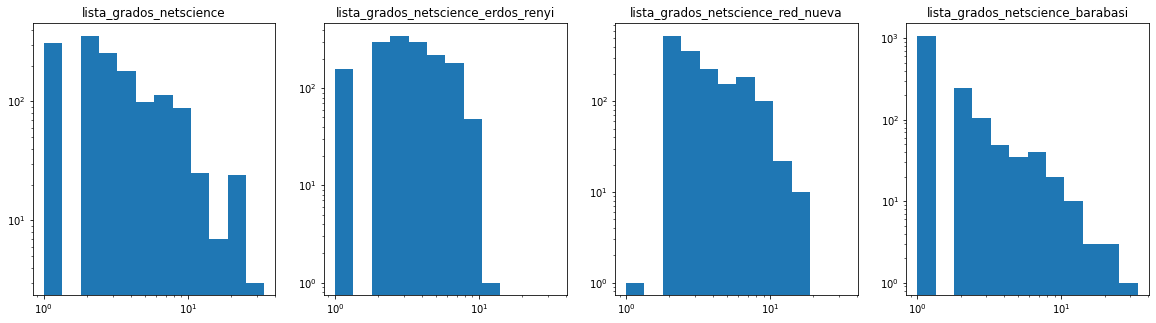

In [ ]:
#netscience
# yo necesito saber p, pero voy a usar las aproximaciones que utilizamos antes
m=len(Red_netscience.edges.data())
n=len(Red_netscience.nodes)
p=(2*m)/(n*(n-1)) #despejo p de la relacion que comprobe antes
netscience_erdos_renyi = erdos_renyi(n, p)
netscience_red_nueva = red_nueva(1,2,n)
netscience_barabasi = barabasi_albert(1, 1, n) #esto hay que ver por lo que unico que puedo fijar conocido es n

lista_grados_netscience = hacer_lista_grados(Red_netscience)
lista_grados_netscience_erdos_renyi = hacer_lista_grados(netscience_erdos_renyi)
lista_grados_netscience_red_nueva = hacer_lista_grados(netscience_red_nueva)
lista_grados_netscience_barabasi = hacer_lista_grados(netscience_barabasi)


lista = [lista_grados_netscience,lista_grados_netscience_erdos_renyi, lista_grados_netscience_red_nueva,lista_grados_netscience_barabasi ]
nombres = ['lista_grados_netscience','lista_grados_netscience_erdos_renyi', 'lista_grados_netscience_red_nueva','lista_grados_netscience_barabasi']
#escala logaritmica
plt.figure(figsize=(20,5))
bines=np.logspace(0,np.log10(np.max(lista[0])),13)
ax1=plt.subplot(1,4,1)
ax1.set_title(nombres[0])
ax1.hist(lista[0],bines)
ax1.set_xscale('log');plt.yscale('log')
ax2=plt.subplot(1,4,2)
ax2.hist(lista[1],bines)
ax2.set_xscale('log');plt.yscale('log')
ax2.set_title(nombres[1])
ax3=plt.subplot(1,4,3)
ax3.hist(lista[2],bines)
ax3.set_xscale('log');plt.yscale('log')
ax3.set_title(nombres[2])
ax4=plt.subplot(1,4,4)
ax4.hist(lista[3],bines)
ax4.set_xscale('log');plt.yscale('log')
ax4.set_title(nombres[3])
plt.show()

En este caso Barabasi devuelve algo relativamente similar, pero con poca representacion para los grados mayores a 10 respecto al dataset.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


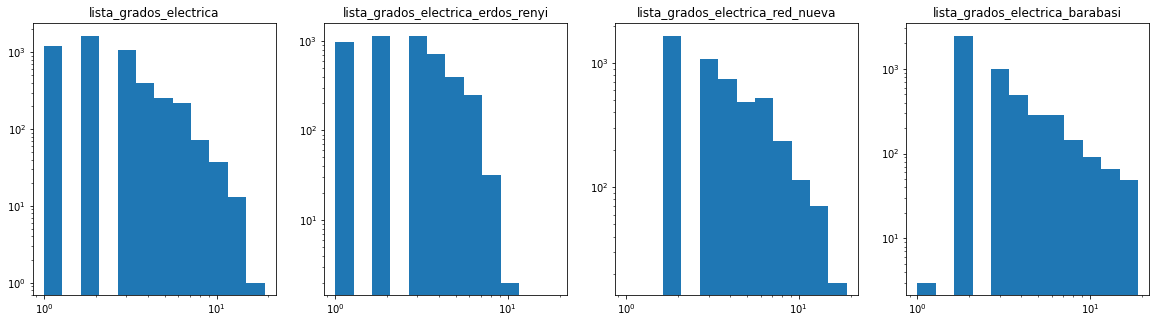

In [ ]:
#Red_electrica
# yo necesito saber p, pero voy a usar las aproximaciones que utilizamos antes
m=len(Red_electrica.edges.data())
n=len(Red_electrica.nodes)
p=(2*m)/(n*(n-1)) #despejo p de la relacion que comprobe antes
electrica_erdos_renyi = erdos_renyi(n, p)
electrica_red_nueva = red_nueva(1,2,n)
electrica_barabasi = barabasi_albert(1, 2, n) #esto hay que ver por lo que unico que puedo fijar conocido es n

lista_grados_electrica = hacer_lista_grados(Red_electrica)
lista_grados_electrica_erdos_renyi = hacer_lista_grados(electrica_erdos_renyi)
lista_grados_electrica_red_nueva = hacer_lista_grados(electrica_red_nueva)
lista_grados_electrica_barabasi = hacer_lista_grados(electrica_barabasi)


lista = [lista_grados_electrica,lista_grados_electrica_erdos_renyi, lista_grados_electrica_red_nueva,lista_grados_electrica_barabasi ]
nombres = ['lista_grados_electrica','lista_grados_electrica_erdos_renyi', 'lista_grados_electrica_red_nueva','lista_grados_electrica_barabasi']
#escala logaritmica
plt.figure(figsize=(20,5))
bines=np.logspace(0,np.log10(np.max(lista[0])),13)
ax1=plt.subplot(1,4,1)
ax1.set_title(nombres[0])
ax1.hist(lista[0],bines)
ax1.set_xscale('log');plt.yscale('log')
ax2=plt.subplot(1,4,2)
ax2.hist(lista[1],bines)
ax2.set_xscale('log');plt.yscale('log')
ax2.set_title(nombres[1])
ax3=plt.subplot(1,4,3)
ax3.hist(lista[2],bines)
ax3.set_xscale('log');plt.yscale('log')
ax3.set_title(nombres[2])
ax4=plt.subplot(1,4,4)
ax4.hist(lista[3],bines)
ax4.set_xscale('log');plt.yscale('log')
ax4.set_title(nombres[3])
plt.show()

En este caso, se puede decir que Erdos Renyi devuelve aproximadamente la misma forma, pero con infrarepresentación de grados mayores a 10. En cambio, Barabasi y la Red del punto 2, no logran replicar el comportamiento para grados bajos.

Como se ve en cada situacion no es posible determinar con que modelo podremos hacer una mejor simulacion de cada red. Haciendo una analisis rápido, en los primeros tres datasets, el modelo de Erdos Renyi da resultados batsante pobres. En cambio, en el ultimo caso, puede replicar la forma de la distribucion de grado mejor que los otros dos. El modelo del punto 2, que nombramos Red nueva, nunca logra simular la dinamica de la distribucion de grados de ninguna de las redes. Con el modelo de Barabasi, si tenemos la mejor adapatación con el dataset Y2H y Netscience. 

## Configuration Model

### El Modelo

En otro universos de modelos, donde lo que se busca no es ya explicar el surgimiento de una red, si no que se busca establecer la relación entre determinadas características topológicas y otras, surge el modelo de Configuration Model.

Dicho modelo parte de una secuencia de grados $(d_i)_{1 \leq i \leq N}$, donde $N$ es el número de nodos y $d_i$ es el grado del nodo i-ésimo. A partir de dicha secuencia, si $d$ cumple con determinadas condiciones, se puede contruir un grafo tal que los grados de los nodos sean exactame los que se establece en la secuencia $(d_i)_{1 \leq i \leq N}$. Sólo pidiendo que $\sum_i d_i = 2 m$ un número par, el grafo que se obtiene, puede contener autoenlaces y enlaces múltiples. El modelo consiste en pensar, primero, a cada nodo con las $k$ medias aristas que le corresponden, y luego, conectar todas las medias aristas entre sí, de forma tal que ninguna quede desconectada.

Este modelo, puede incluirse dentro de una amplia gama de modelos que surgen de maximizar la entropía asociada a la probabilidad de que un grafo $G$ ocurra, sometido a vínculos fuertes. Esto sería en cierta medida equivalente a lo que en Física se conoce como Ensamble Microcanónico.

Lo interesante de este modelo es que la secuencia de grado $d$ puede ser algo ya dado o bien puede ser una realización de una determinada distribución de probabilidades. Así, tenemos dos instancias de aleatoriedad: a al hora de armar $d$ y a la hora de armar el grafo $G$.


### El Algoritmo

Veamos entonces cómo pensamos este algoritmo. Sea $(d_i)_{1 \leq i \leq N}$:



1.   En un objeto, hacemos que cada nodo aparezca $k$ veces, donde $k$ es su grado
2.   Dividimos dicho objeto en $2$.
3.   Tomamos alguna de las dos partes y la ordenamos de forma aleatoria
4.   Concatenamos ambos objetos, de forma tal que pasemos a tener un objeto cuyos elementos sean las tuplas que indican los enlaces.
5.   Alternativamente podríamos incluir en el algoritmo una condición que apunte a quedarse con grafos que tengan bajo porcentaje de autoenlaces o enlaces múltiples.

Veamos entonces una propuesta de implementación



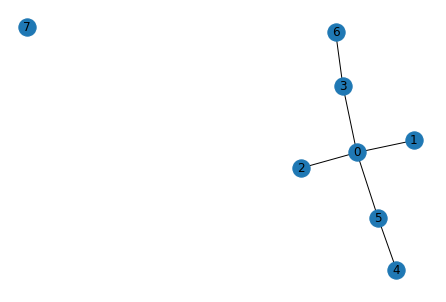

In [ ]:
def cm(d):
    assert sum(d) % 2 == 0
    autoEnlace = True
    enlaceMultiple = True
    while autoEnlace == True or enlaceMultiple == True:
        e = [i for i, ki in enumerate(d) for j in range(ki)]
        rm.shuffle(e)
        e1, e2 = e[:len(e) // 2], e[len(e) // 2:]
        e = [(i,j) for i, j in zip(e1, e2)]
        G = nx.empty_graph(n = len(d), create_using = nx.MultiGraph)
        G.add_edges_from(e)
        G = nx.Graph(G)
        autoEnlace = False # suponemos que no tiene autoenlaces
        for i in list(G.edges()):
            if i[0]==i[1]:#si tiene autoenlace, se vuelve true, y entonces vuelve a comenzar el while
                autoEnlace = True
        enlaceMultiple = False #al igual que con autoenlace, también suponemos que no los tiene
        count_i=0
        count_j=0
        for i in list(G.edges()):
            count_i+=1
            for j in list(G.edges()):
                count_j+=1
                if count_i != count_j and i[0]==j[1] and i[1]==j[0]:
                    enlaceMultiple = True # si los tiene, se vuelve true y comenzamos otra vez el while
                # if count_i != count_j and i[0]==j[0] and i[1]==j[1]:
                    # enlaceMultiple = True
    return G

def secuenciaDeGrados(N):
    result = np.random.poisson(2,N)
    while sum(result) %2 != 0:
        result = np.random.poisson(2,N)
    return result

d = secuenciaDeGrados(8)
# d = [2 for i in range(20)]
G = cm(d)
nx.draw(G,with_labels=True)
plt.show()



In [ ]:

def mean_degree(lista_de_grados): #función que me tira el promedio de grados
    dict_de_grados = dict(lista_de_grados)
    result=0
    for i in range(len(dict_de_grados.values())):
        result+=list(dict_de_grados.values())[i]
    return result/len(dict_de_grados.values())

delfines = nx.read_gml("/content/dolphins.gml")
grado_medio = mean_degree(nx.degree(delfines)) #Con este grado medio saco un lambda para calcular la media de la distribución poissoneana

clustering_aleatorio = []
for i in range(1000):
    d = secuenciaDeGrados(62)#62 es el número de nodos de la red de delfines
    G = cm(d)
    clustering_aleatorio.append(nx.average_clustering(G))
clustering_medio_aleatorio = np.mean(clustering_aleatorio)
clustering_medio_delfines = nx.average_clustering(delfines)
print("media del clustering medio de 1000 redes aleatorias", clustering_medio_aleatorio)
print("clustering medio de delfines", clustering_medio_delfines)



media del clustering medio de 1000 redes aleatorias 0.019360458269329237
clustering medio de delfines 0.2589582460550202
